In [481]:
import numpy as np
import pandas as pd 
from time import clock
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits

from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

import vs
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

In [485]:
dims = [2,5,10,15,20,25,30,35,40,45,50,55,60]
nn_reg = [0.001]
nn_arch= [(50,50)]

In [380]:
digits=load_digits()
digits_data = digits.data
digitsY = digits.target
digitsX= MaxAbsScaler().fit_transform(digits_data)

In [214]:
np.corrcoef(np.transpose(digits_data))

/Users/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,  1.        ,  0.55661811, ..., -0.02987023,
         0.02654717, -0.0438888 ],
       [        nan,  0.55661811,  1.        , ..., -0.04118272,
         0.07259882,  0.08252314],
       ...,
       [        nan, -0.02987023, -0.04118272, ...,  1.        ,
         0.64832776,  0.26199116],
       [        nan,  0.02654717,  0.07259882, ...,  0.64832776,
         1.        ,  0.6204281 ],
       [        nan, -0.0438888 ,  0.08252314, ...,  0.26199116,
         0.6204281 ,  1.        ]])

In [211]:
digits_data.shape

(1797, 64)

/Users/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


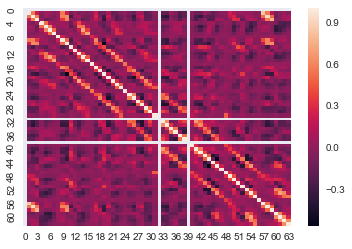

In [215]:
sns.heatmap(np.corrcoef(np.transpose(digits_data)));

In [91]:
sse=[]
shs=[]
bic=[]
time=[]

clusters =  np.arange(2,21)

for k in clusters:
    st = clock()
    m=KMeans(k,random_state=0).fit(digitsX)
    time.append(clock()-st)
    sse.append(m.score(digitsX))
    shs.append(silhouette_score(digitsX,m.predict(digits_data)))
    bic.append(vs.compute_bic(m,digitsX))
    


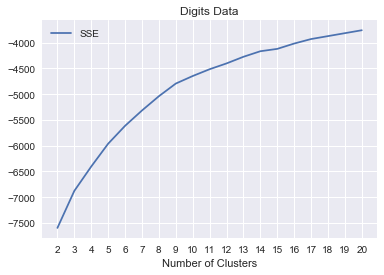

In [92]:
plt.plot(clusters,sse, label='SSE');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('K-Means: Digits Data');
plt.xticks(clusters);

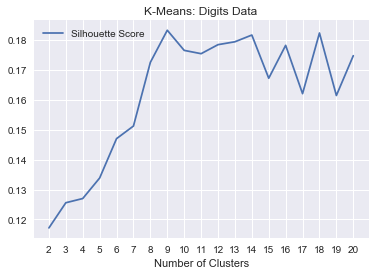

In [93]:
plt.plot(clusters,shs, label='Silhouette Score');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('K-Means: Digits Data');
plt.xticks(clusters);

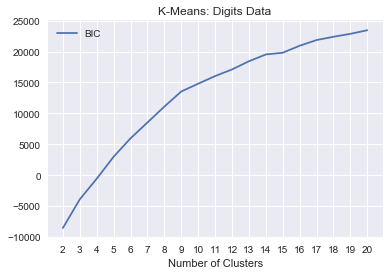

In [94]:
plt.plot(clusters,bic, label='BIC');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('K-Means: Digits Data');
plt.xticks(clusters);

In [95]:
kmeans = KMeans( n_clusters = 9, random_state = 0) 
clusters = kmeans.fit_predict(digits.data) 
kmeans.cluster_centers_.shape

(9, 64)

In [96]:
km_models[7].cluster_centers_.shape

(9, 64)

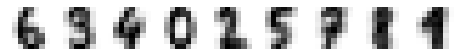

In [97]:
fig, ax = plt.subplots(1,9, figsize =( 8, 3)) 
centers = kmeans.cluster_centers_.reshape( 9, 8, 8) 
for axi, center in zip( ax.flat, centers): 
    axi.set(xticks =[], yticks =[]) 
    axi.imshow( center, interpolation ='nearest', cmap = plt.cm.binary)

In [98]:
from scipy.stats import mode 
labels = np.zeros_like( clusters) 
for i in range(9): 
    mask = (clusters == i) 
    labels[ mask] = mode(digits.target[mask])[0]

In [99]:
from sklearn.metrics import accuracy_score 
accuracy_score(digits.target, labels)

0.7239844184752365

In [85]:
## Gausian Mixture Models

In [216]:
ll=[]
bic=[]
aic=[]
time=[]

clusters =  np.arange(2,21)

for k in clusters:
    st = clock()
    m=GaussianMixture(k,covariance_type='diag',random_state=0).fit(digits_data)
    time.append(clock()-st)
    ll.append(m.score(digits_data))
    aic.append(m.aic(digits_data))
    bic.append(m.bic(digits_data))
    

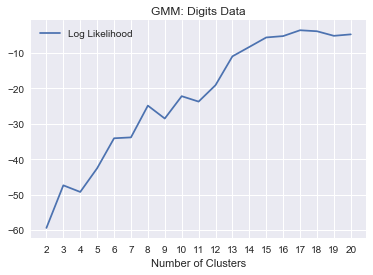

In [217]:
plt.plot(clusters,ll, label='Log Likelihood');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('GMM: Digits Data');
plt.xticks(clusters);

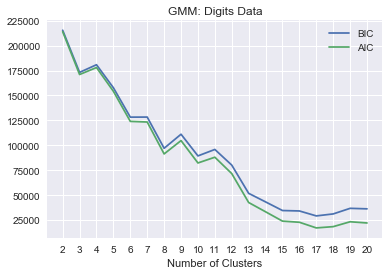

In [218]:
plt.plot(clusters,bic, label='BIC');
plt.plot(clusters,aic, label='AIC');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('GMM: Digits Data');
plt.xticks(clusters);

In [115]:
digitsX.shape

(1797, 64)

In [219]:
gmm=GaussianMixture(10,covariance_type='diag',random_state=0).fit(digits_data)

In [220]:
accuracy_score(digits.target,gmm.predict(digits_data))

0.2426265998887034

In [221]:
gmm.predict(digits_data)

array([1, 2, 7, ..., 2, 3, 0])

In [222]:
new_data=gmm.sample(10)

In [238]:
def plot_digits(data): 
    fig, ax = plt.subplots(1, 10, figsize =(8, 8), 
                           subplot_kw = dict( xticks =[], yticks =[])) 
    fig.subplots_adjust( hspace = 0.05, wspace = 0.05) 
    for i, axi in enumerate( ax.flat): 
        im = axi.imshow(data[ i]. reshape(8, 8), cmap ='binary') 
        im.set_clim( 0, 16)


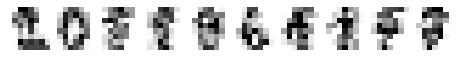

In [224]:
 plot_digits(new_data[0])

In [188]:
## PCA

In [256]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(digitsX)

In [292]:
# get eig_vals
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals_n = pd.Series(eig_vals)/ np.sum(eig_vals)

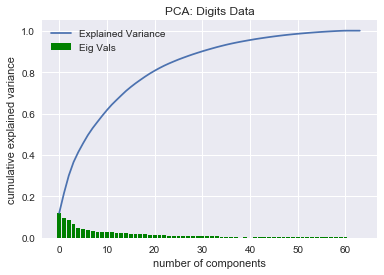

In [295]:
pca = PCA().fit(X_std) 
plt.plot( np.cumsum( pca.explained_variance_ratio_),label='Explained Variance') 
y_pos = np.arange(len(eig_vals_n))
plt.bar(y_pos,eig_vals_n,label='Eig Vals',color='g')
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');
plt.title('PCA: Digits Data');
plt.legend(loc='best');

In [296]:
def recon_error(n,data):
    mse=[]
    for i in range(n):
        pca = PCA(i,random_state=0).fit(data)
        components = pca.transform(digitsX)
        X_projected = pca.inverse_transform(components)
        mse.append(((digitsX - X_projected) ** 2).mean())
    return mse

In [307]:
re=recon_error(60,X_std)

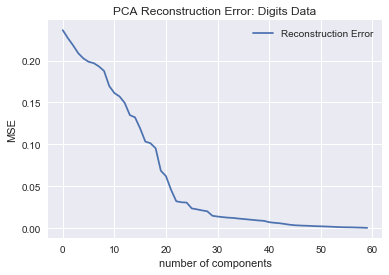

In [310]:
plt.plot(re,label='Reconstruction Error') ;
plt.xlabel('number of components') 
plt.ylabel('MSE');
plt.title('PCA Reconstruction Error: Digits Data');
plt.legend(loc='best');

In [337]:
pca = PCA(.80,whiten=False,random_state=0)
pca_reduced_data = pca.fit_transform(X_std)
X_projected = pca.inverse_transform(pca_reduced_data)
pca_reduced_data.shape

(1797, 21)

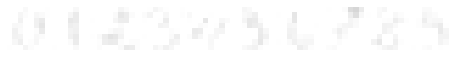

In [338]:
plot_digits(X_projected)

In [ ]:
## PCA + NN

In [486]:
grid ={'pca__n_components':dims,'NN__alpha':nn_reg,'NN__hidden_layer_sizes':nn_arch}
pca = PCA(random_state=5)       
mlp = MLPClassifier(activation='relu',max_iter=2000,early_stopping=True,random_state=5)
pipe = Pipeline([('pca',pca),('NN',mlp)])
gs = GridSearchCV(pipe,grid,verbose=10,cv=5)

gs.fit(digitsX,digitsY)
pc_nn=pd.DataFrame(gs.cv_results_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2, score=0.5521978021978022, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2, score=0.6160220994475138, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2, score=0.5431754874651811, total=   0.1s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2, score=0.484593837535014, total=   0.1s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=2, score=0.4197183098591549, total=   0.1s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5, score=0.7857142857142857, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5, score=0.7762430939226519, total=   0.1s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s


[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5, score=0.8217270194986073, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s


[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5, score=0.834733893557423, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=5, score=0.7464788732394366, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s


[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10, score=0.8791208791208791, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10, score=0.850828729281768, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10, score=0.8746518105849582, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10, score=0.9215686274509803, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=10, score=0.8507042253521127, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=15 
[CV]  NN__alpha=0.001, NN_

[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=50, score=0.9523809523809523, total=   0.3s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=50 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=50, score=0.8507042253521127, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=55 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=55, score=0.8818681318681318, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=55 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=55, score=0.8839779005524862, total=   0.3s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=55 
[CV]  NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=55, score=0.8913649025069638, total=   0.2s
[CV] NN__alpha=0.001, NN__hidden_layer_sizes=(50, 50), pca__n_components=55 
[CV]  NN__alpha=0.001, NN

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   13.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=5,
  svd_solver='auto', tol=0.0, whiten=False)), ('NN', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_size...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], 'NN__alpha': [0.001], 'NN__hidden_layer_sizes': [(50, 50)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_NN__alpha,param_NN__hidden_layer_sizes,param_pca__n_components,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.118488,0.000909,0.523651,0.536477,0.001,"(50, 50)",2,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",13,0.552198,...,0.543175,0.525730,0.484594,0.456944,0.419718,0.455617,0.038475,0.000124,0.066310,0.074883
1,0.181333,0.000888,0.792988,0.828285,0.001,"(50, 50)",5,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",12,0.785714,...,0.821727,0.842837,0.834734,0.854167,0.746479,0.838419,0.024898,0.000031,0.031713,0.021516
2,0.198412,0.000902,0.875348,0.914713,0.001,"(50, 50)",10,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",11,0.879121,...,0.874652,0.897775,0.921569,0.931944,0.850704,0.910541,0.027456,0.000048,0.025855,0.016753
3,0.229209,0.000893,0.901503,0.949657,0.001,"(50, 50)",15,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",6,0.901099,...,0.916435,0.962448,0.935574,0.931250,0.870423,0.939667,0.018591,0.000059,0.022976,0.012165
4,0.184927,0.000910,0.898720,0.940974,0.001,"(50, 50)",20,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",9,0.887363,...,0.924791,0.952017,0.949580,0.945833,0.873239,0.967406,0.028100,0.000038,0.033467,0.018838
5,0.202959,0.000932,0.902059,0.953977,0.001,"(50, 50)",25,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",5,0.912088,...,0.916435,0.961057,0.929972,0.930556,0.847887,0.945215,0.026661,0.000026,0.028222,0.014102
6,0.189999,0.001037,0.889260,0.946587,0.001,"(50, 50)",30,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",10,0.903846,...,0.894150,0.943672,0.932773,0.934722,0.853521,0.950763,0.014967,0.000050,0.028764,0.008507
7,0.196897,0.000999,0.899833,0.954652,0.001,"(50, 50)",35,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",7,0.923077,...,0.866295,0.921419,0.955182,0.960417,0.867606,0.961859,0.023670,0.000094,0.034387,0.016775
8,0.234582,0.000991,0.909293,0.963700,0.001,"(50, 50)",40,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",3,0.887363,...,0.944290,0.979138,0.952381,0.945833,0.856338,0.956311,0.033700,0.000091,0.035595,0.014496
9,0.239825,0.001087,0.912632,0.966060,0.001,"(50, 50)",45,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",2,0.906593,...,0.935933,0.975661,0.949580,0.940278,0.867606,0.974341,0.031492,0.000106,0.028374,0.013817


In [339]:
# PCA + K means

In [340]:
sse=[]
shs=[]
bic=[]
time=[]

clusters =  np.arange(2,21)

for k in clusters:
    st = clock()
    m=KMeans(k,random_state=0).fit(pca_reduced_data)
    time.append(clock()-st)
    sse.append(m.score(pca_reduced_data))
    shs.append(silhouette_score(pca_data,m.predict(pca_reduced_data)))
    bic.append(vs.compute_bic(m,pca_reduced_data))

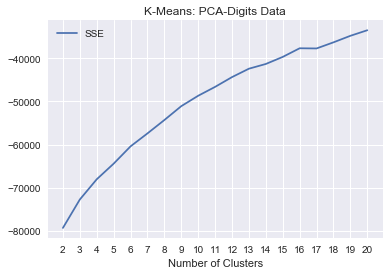

In [341]:
plt.plot(clusters,sse, label='SSE');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('K-Means: PCA-Digits Data');
plt.xticks(clusters);

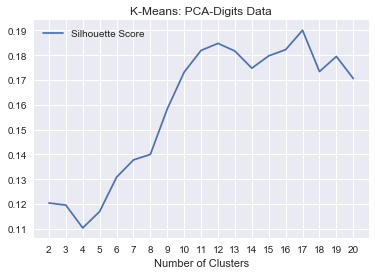

In [342]:
plt.plot(clusters,shs, label='Silhouette Score');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('K-Means: PCA-Digits Data');
plt.xticks(clusters);

In [ ]:
## PCA + GMM

In [355]:
ll=[]
bic=[]
aic=[]
time=[]

clusters =  np.arange(10,100,10)

for k in clusters:
    st = clock()
    m=GaussianMixture(k,covariance_type='diag',random_state=0).fit(pca_reduced_data)
    time.append(clock()-st)
    ll.append(m.score(pca_reduced_data))
    aic.append(m.aic(pca_reduced_data))
    bic.append(m.bic(pca_reduced_data))

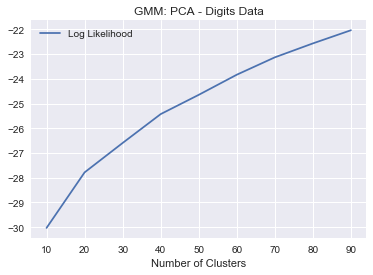

In [356]:
plt.plot(clusters,ll, label='Log Likelihood');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('GMM: PCA - Digits Data');
plt.xticks(clusters);

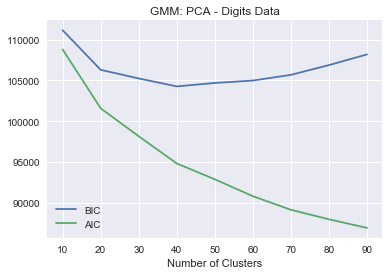

In [357]:
plt.plot(clusters,bic, label='BIC');
plt.plot(clusters,aic, label='AIC');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('GMM: PCA - Digits Data');
plt.xticks(clusters);

In [358]:
## ICA

In [359]:
from sklearn.decomposition import FastICA

In [367]:
dims = [2,5,10,15,20,25,30,35,40,45,50,55,60]
ica = FastICA(random_state=5,max_iter=500)
kurt = {}
for dim in dims:
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(digitsX)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt[dim] = tmp.abs().mean()

kurt = pd.Series(kurt) 

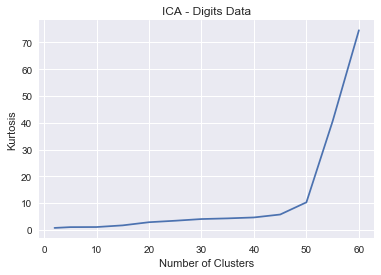

In [375]:
ax=kurt.plot(title='ICA - Digits Data');
ax.set_xlabel("Number of Clusters");
ax.set_ylabel("Kurtosis");

In [377]:
ica = FastICA(random_state=5,n_components=60).fit(digitsX)

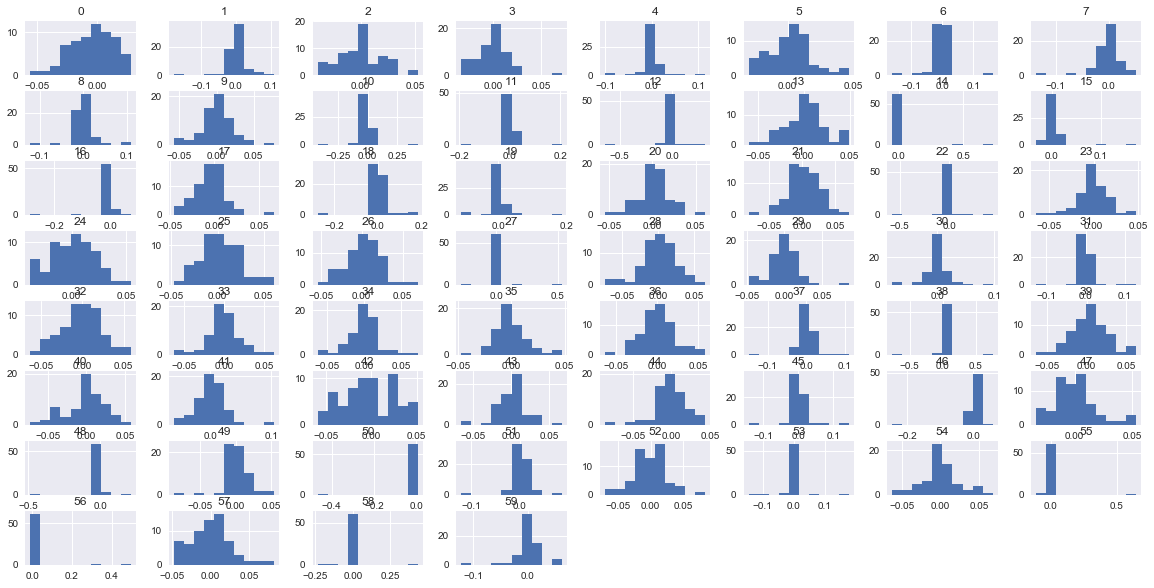

In [413]:
(pd.DataFrame(ica.components_).T).hist(figsize=(20,10));

In [ ]:
## ICA + K - Means

In [401]:
dim = 60
ica = FastICA(n_components=dim,random_state=10)
digitsX2 = ica.fit_transform(digitsX)
digits2 = pd.DataFrame(np.hstack((digitsX2,np.atleast_2d(digitsY).T)))
cols = list(range(digits2.shape[1]))
cols[-1] = 'Class'
digits2.columns = cols

In [415]:
digits2.shape

(1797, 61)

In [432]:
sse=[]
shs=[]
bic=[]
time=[]

ica_digits_x=digits2.drop('Class',axis=1)
ica_digits_y=digits2['Class']

clusters =  np.arange(10,200,20)

for k in clusters:
    st = clock()
    m=KMeans(k,random_state=0).fit(ica_digits_x)
    time.append(clock()-st)
    sse.append(m.score(ica_digits_x))
    shs.append(silhouette_score(ica_digits_x,m.predict(ica_digits_x)))

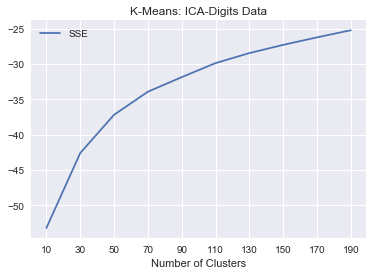

In [433]:
plt.plot(clusters,sse, label='SSE');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('K-Means: ICA-Digits Data');
plt.xticks(clusters);

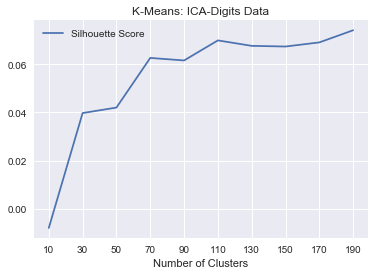

In [434]:
plt.plot(clusters,shs, label='Silhouette Score');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('K-Means: ICA-Digits Data');
plt.xticks(clusters);

In [ ]:
## ICA + GMM

In [435]:
ll=[]
bic=[]
aic=[]
time=[]

clusters =  np.arange(10,100,10)

for k in clusters:
    st = clock()
    m=GaussianMixture(k,covariance_type='diag',random_state=0).fit(ica_digits_x)
    time.append(clock()-st)
    ll.append(m.score(ica_digits_x))
    aic.append(m.aic(ica_digits_x))
    bic.append(m.bic(ica_digits_x))

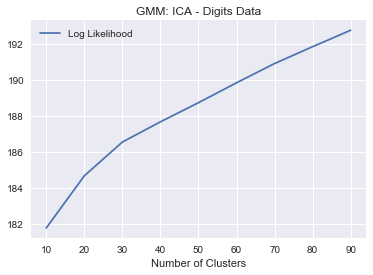

In [436]:
plt.plot(clusters,ll, label='Log Likelihood');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('GMM: ICA - Digits Data');
plt.xticks(clusters);

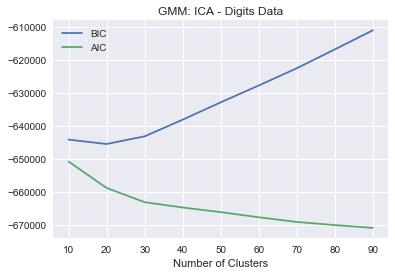

In [437]:
plt.plot(clusters,bic, label='BIC');
plt.plot(clusters,aic, label='AIC');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('GMM: ICA - Digits Data');
plt.xticks(clusters);

In [ ]:
## RP

In [441]:
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from itertools import product

In [451]:
def reconstructionError(projections,X):
    W = projections.components_
    if sps.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed = ((p@W)@(X.T)).T # Unproject projected data
    errors = np.square(X-reconstructed)
    return np.nanmean(errors)

def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

from sklearn.metrics.pairwise import pairwise_distances
import scipy.sparse as sps
from scipy.linalg import pinv

In [447]:
tmp = defaultdict(dict)
for i,dim in product(range(10),dims):
    rp = SparseRandomProjection(random_state=i, n_components=dim)
    tmp[dim][i] = pairwiseDistCorr(rp.fit_transform(digitsX), digitsX)
srp =pd.DataFrame(tmp).T

In [ ]:
ax=kurt.plot(title='ICA - Digits Data');
ax.set_xlabel("Number of Clusters");
ax.set_ylabel("Kurtosis");

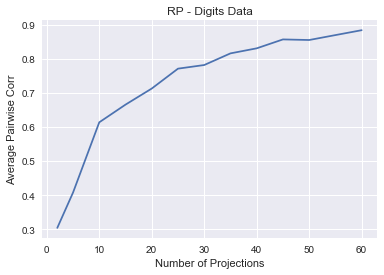

In [460]:
ax = srp.mean(axis=1).plot(title='RP - Digits Data')
ax.set_xlabel("Number of Projections");
ax.set_ylabel("Average Pairwise Corr");

In [452]:
tmp = defaultdict(dict)
for i,dim in product(range(10),dims):
    rp = SparseRandomProjection(random_state=i, n_components=dim)
    rp.fit(digitsX)  
    tmp[dim][i] = reconstructionError(rp, digitsX)
srp_recon =pd.DataFrame(tmp).T

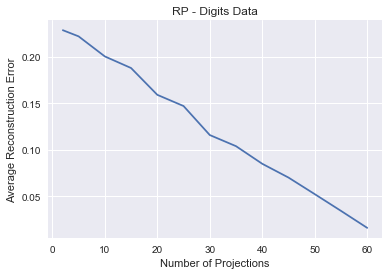

In [461]:
ax = srp_recon.mean(axis=1).plot(title='RP - Digits Data')
ax.set_xlabel("Number of Projections");
ax.set_ylabel("Average Reconstruction Error");

In [ ]:
## RP + Kmeans

In [462]:
dim = 60
rp = SparseRandomProjection(n_components=dim,random_state=5)
digitsX2 = rp.fit_transform(digitsX)

In [471]:
sse=[]
shs=[]
bic=[]
time=[]

clusters =  np.arange(2,60,5)

for k in clusters:
    st = clock()
    m=KMeans(k,random_state=0).fit(digitsX2)
    time.append(clock()-st)
    sse.append(m.score(digitsX2))
    shs.append(silhouette_score(digitsX2,m.predict(digitsX2)))

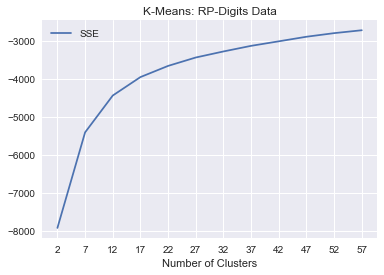

In [474]:
plt.plot(clusters,sse, label='SSE');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('K-Means: RP-Digits Data');
plt.xticks(clusters);

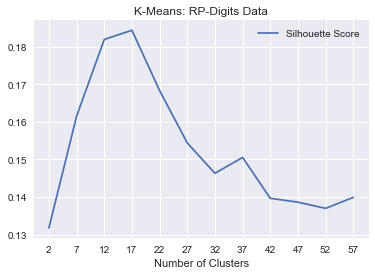

In [475]:
plt.plot(clusters,shs, label='Silhouette Score');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('K-Means: RP-Digits Data');
plt.xticks(clusters);

In [ ]:
## RP + GMM

In [476]:
ll=[]
bic=[]
aic=[]
time=[]

clusters =  np.arange(2,100,5)

for k in clusters:
    st = clock()
    m=GaussianMixture(k,covariance_type='diag',random_state=0).fit(digitsX2)
    time.append(clock()-st)
    ll.append(m.score(digitsX2))
    aic.append(m.aic(digitsX2))
    bic.append(m.bic(digitsX2))

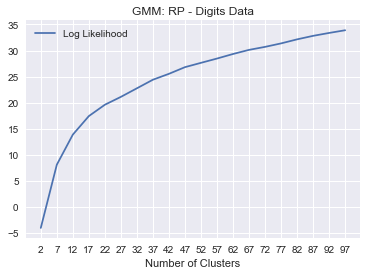

In [477]:
plt.plot(clusters,ll, label='Log Likelihood');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('GMM: RP - Digits Data');
plt.xticks(clusters);

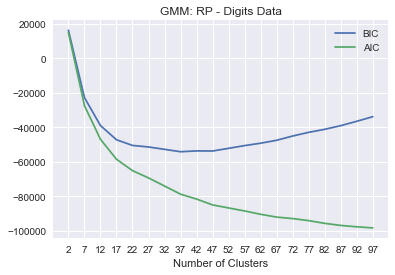

In [478]:
plt.plot(clusters,bic, label='BIC');
plt.plot(clusters,aic, label='AIC');
plt.legend(loc='best');
plt.xlabel('Number of Clusters')
plt.title('GMM: RP - Digits Data');
plt.xticks(clusters);

In [197]:
dims = [2,5,10,15,20,25,30,35,40,45,50,55,60]
nn_reg = [10**-x for x in range(1,5)]
nn_arch= [(50,50),(50,),(25,),(25,25),(100,25,100)]

In [199]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [200]:
grid ={'pca__n_components':dims,'NN__alpha':nn_reg,'NN__hidden_layer_sizes':nn_arch}
pca = PCA(random_state=5)       
mlp = MLPClassifier(activation='relu',max_iter=2000,early_stopping=True,random_state=5)
pipe = Pipeline([('pca',pca),('NN',mlp)])
gs = GridSearchCV(pipe,grid,verbose=10,cv=5)
gs.fit(digitsX,digits.target)

In [205]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_NN__alpha', 'param_NN__hidden_layer_sizes', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [206]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=25, random_state=5,
  svd_solver='auto', tol=0.0, whiten=False)), ('NN', MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(1...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

In [ ]:
## ica

In [ ]:
ica = FastICA(random_state=5)
kurt = {}
for dim in dims:
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(digitsX)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt[dim] = tmp.abs().mean()